Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [187]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [188]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(f"x = {X}\ny={y}")

x = [[0]
 [1]
 [2]
 [4]]
y=[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [189]:
from sklearn.preprocessing import PolynomialFeatures

def matrica_dizajna(matrica, type, deg):
  poly = PolynomialFeatures(degree = deg)
  if type == int:
    return poly.fit_transform(matrica).astype(int)
  else:
    return poly.fit_transform(matrica)

phi = matrica_dizajna(X, int, 1)
print(f"phi= {phi}")
print()

#isprobavanje primjera
X1 = np.array([[0,5],[1,6],[2,7],[4,8]])
phi1 = matrica_dizajna(X1, float, 1)
print(phi1)
print()
X2 = np.array([[0,5,9,13],[1,6,10,14],[2,7,1,15],[4,8,12,16]])
phi2 = matrica_dizajna(X2,int, 1)
print(phi2)

phi= [[1 0]
 [1 1]
 [1 2]
 [1 4]]

[[1. 0. 5.]
 [1. 1. 6.]
 [1. 2. 7.]
 [1. 4. 8.]]

[[ 1  0  5  9 13]
 [ 1  1  6 10 14]
 [ 1  2  7  1 15]
 [ 1  4  8 12 16]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [190]:
from numpy import linalg

def w_a(phi ,y):
  phi_T = np.matrix.transpose(phi)

  pseudoinverz = np.dot(np.linalg.inv(np.dot(phi_T,phi)),phi_T) #Moore-Penroseov inverz

  return np.dot(pseudoinverz, y)


def w_b(phi ,y):
  pseudoinverz = np.linalg.pinv(phi)

  return np.dot(pseudoinverz, y)
  

In [191]:
w_a = w_a(phi,y)
w_b= w_b(phi,y)

print(f"w_a = {w_a}\nw_b = {w_b}")

w_a = [2.2        0.45714286]
w_b = [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [192]:
from sklearn.metrics import mean_squared_error

def h_x(w,phi):
  #model sustava
  print(f"w= {w}\nphi={phi}\n")
  h=[np.dot(np.matrix.transpose(w), pr) for pr in phi] #množenje prvo s prvim stupcem(primjerom) pa s drugim
  return h

def E_mse(y,h_x):
  #srednja kvadratna pogreška
  E= mean_squared_error(y,h_x)
  return E

def E_formula(y, h_x):
  #pogreška učenja po zadanoj formuli
  E= 0
  for i in range(len(h_x)):   #iterate from 0 to length of h_x - access all the elements
    E += np.power(y[i]-h_x[i],2)
  E = 0.5*E
  return E

w= [2.2        0.45714286]
phi=[[1 0]
 [1 1]
 [1 2]
 [1 4]]

h(x*)= [2.1999999999999993, 2.6571428571428566, 3.114285714285714, 4.0285714285714285]
y= [4 1 2 5]
 


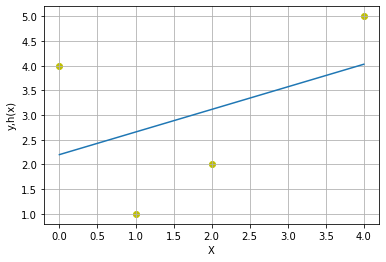

E_mse(h\D) = 2.042857142857143 -> SREDNJA KVADRATNA POGREŠKA
E_formula(h\D) = 4.085714285714286 -> POGREŠKA UČENJA


In [193]:
h_x = h_x(w_b, phi)
print(f"h(x*)= {h_x}\ny= {y}\n ")

#a)
plt.scatter(X,y,color='y') #primjeri-kružići
plt.plot(X, h_x) #model-pravac
plt.xlabel('X')
plt.ylabel('y,h(x)')
plt.grid()
plt.show()

#b)
E_mse = E_mse(y, h_x)       
E_formula = E_formula(y, h_x)

print(f"E_mse(h\D) = {E_mse} -> SREDNJA KVADRATNA POGREŠKA")
print(f"E_formula(h\D) = {E_formula} -> POGREŠKA UČENJA")

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [194]:
print(f"Dimenzija matrice: {phi.shape[0]} x {phi.shape[1]}")

try:
  w = np.linalg.inv(phi) * y
except Exception as e: 
  print(e)


Dimenzija matrice: 4 x 2
Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

def E_formula_2(y,prediction):
  #oduzimanje y(stvarnog izlaza) dobivenog treniranjem i predviđenog izlaza y-pred na kvadrat
  E = 0
  for y, y_pred in zip(y, prediction):
    E += np.power((y - y_pred), 2)
  return E *0.5
  

#define regression model
model = linear_model.LinearRegression()

#build training model 
model.fit(X,y)
#model prediction - s X da se izuzme pomak nastao dodavanjem dummy jedinice
prediction = model.predict(X)

print(f"w_1 = {model.coef_[0]} -> NAGIB PRAVCA\n") 
print(f"w_0 = {model.intercept_} -> ODSJEČAK NA Y OSI\n")

print(f"E_formula(h\D) = {E_formula_2(y, prediction)} -> POGREŠKA UČENJA")

w_1 = 0.45714285714285713 -> NAGIB PRAVCA

w_0 = 2.2 -> ODSJEČAK NA Y OSI

E_formula(h\D) = 4.085714285714286 -> POGREŠKA UČENJA


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [196]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    #generiranje vektora oznaka
    f_x = []
    N = X.shape[0] #broj elemenata stupca
    gaussian_noise = np.random.normal(0, noise, size=(N,1))
    for element in np.nditer(X):
      f_x.append(f(element))
    f_x_array = np.array([[i] for i in f_x]) #pretvaranje liste u array
    y = f_x_array + gaussian_noise
    return y

In [197]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [198]:
f = lambda x: 5+x-2*np.power(x,2)-5*np.power(x,3)

#stavaranje 50 uniformin primjera na [-5,5]
x_t = make_instances(-5,5,50)
print(x_t.shape)
#izračun izlaza y
y_t = make_labels(x_t, f, 200)
print(y_t.shape)

(50, 1)
(50, 1)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

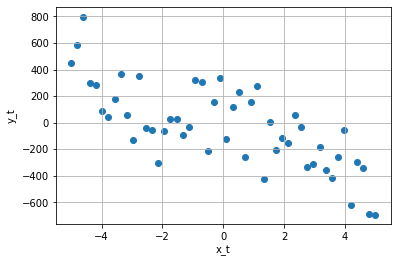

In [199]:
plt.scatter(x_t,y_t)
plt.xlabel('x_t')
plt.ylabel('y_t')
plt.grid()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [200]:
def h_x(w,phi):
  #model
  h=[np.dot(np.matrix.transpose(w), pr) for pr in phi] #množenje prvo s prvim stupcem(primjerom) pa s drugim
  return h
def w(phi ,y):
  #vektor parametara
  pseudoinverz = np.linalg.pinv(phi)
  return np.dot(pseudoinverz, y)
def E_formula(y_train, y_test):
  #oduzimanje y(stvarnog izlaza) dobivenog treniranjem i predviđenog izlaza y-pred na kvadrat
  E = 0
  for y, y_pred in zip(y_train, y_test):
    E += np.power((y - y_pred), 2)
  return E *0.5

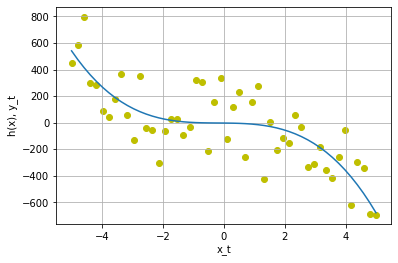


E_formula(h\D) = 879081.1765618656 -> POGREŠKA UČENJA


In [201]:
phi = matrica_dizajna(x_t, float, 3)
w = w(phi, y_t)
h = h_x(w,phi)

plt.plot(x_t, h)
plt.scatter(x_t, y_t, color='y')
plt.xlabel('x_t')
plt.ylabel('h(x), y_t')
plt.grid()
plt.show()

print(f"\nE_formula(h\D) = {E_formula(h, y_t)[0]} -> POGREŠKA UČENJA")

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E_formula(h\D)[polinom= 1] = 1119620.2888636112 -> POGREŠKA UČENJA UZ POLINOM 1. STUPNJA

E_formula(h\D)[polinom= 3] = 879081.1765618656 -> POGREŠKA UČENJA UZ POLINOM 3. STUPNJA

E_formula(h\D)[polinom= 5] = 832530.0856975481 -> POGREŠKA UČENJA UZ POLINOM 5. STUPNJA

E_formula(h\D)[polinom= 10] = 740699.610475768 -> POGREŠKA UČENJA UZ POLINOM 10. STUPNJA

E_formula(h\D)[polinom= 20] = 596688.8219657767 -> POGREŠKA UČENJA UZ POLINOM 20. STUPNJA



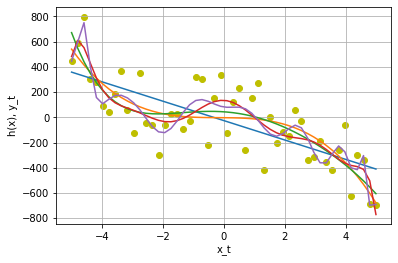

In [202]:

# Vaš kôd ovdje
for polinom in [1,3,5,10,20]:
  phi = matrica_dizajna(x_t , float, polinom)
  w = np.dot(np.linalg.pinv(phi),y_t)
  h = h_x(w,phi)

  plt.plot(x_t, h)

  print(f"E_formula(h\D)[polinom= {polinom}] = {E_formula(h, y_t)[0]} -> POGREŠKA UČENJA UZ POLINOM {polinom}. STUPNJA\n")

plt.scatter(x_t, y_t, color='y')
plt.xlabel('x_t')
plt.ylabel('h(x), y_t')
plt.grid()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

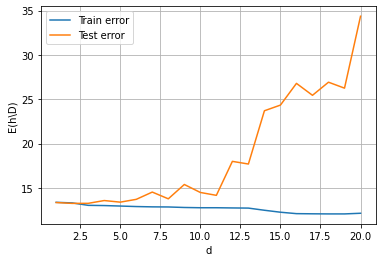

In [203]:
from sklearn.model_selection import train_test_split
x_t = make_instances(-5,5,50)
y_t = make_labels(x_t, f, 200)

x_train,x_test,y_train,y_test = train_test_split(x_t,y_t, test_size=0.5) #omjer 1:1 zato 0.5
E_train = []
E_test = []

#1. način-klasično
for polinom in range(1,21): #za sve stupnje polinoma de[0,20]
    #train model
    phi_train = matrica_dizajna(x_train , float, polinom)
    w = np.dot(np.linalg.pinv(phi_train),y_train)
    h_train = h_x(w,phi_train)
    E= E_formula(h_train, y_train)
    #print(E)
    E_train.append(np.log(E))
    
    #test model
    phi_test = matrica_dizajna(x_test , float, polinom)
    #w isti za oba
    h_test = h_x(w,phi_test)
    E = E_formula(h_test, y_test)
    E_test.append(np.log(E))

plt.plot(list(range(1,21)), E_train, label='Train error')
plt.plot(list(range(1,21)), E_test, label='Test error')
plt.legend(loc="best")
plt.xlabel('d')
plt.ylabel('E(h\D)')
plt.grid()
plt.show()

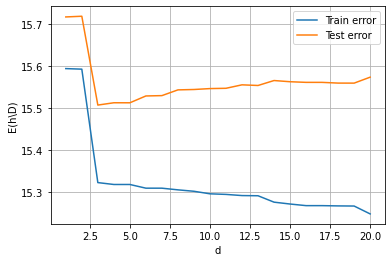

In [204]:
#Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

x_t = make_instances(-5,5,500)
y_t = make_labels(x_t, f, 200)

x_train,x_test,y_train,y_test = train_test_split(x_t,y_t, test_size=0.5) #omjer 1:1 zato 0.5
E_train = []
E_test = []

#1. način-klasično
for polinom in range(1,21): #za sve stupnje polinoma de[0,20]
    #train model
    phi_train = matrica_dizajna(x_train , float, polinom)
    w = np.dot(np.linalg.pinv(phi_train),y_train)
    h_train = h_x(w,phi_train)
    E= E_formula(h_train, y_train)
    #print(E)
    E_train.append(np.log(E))
    
    #test model
    phi_test = matrica_dizajna(x_test , float, polinom)
    #w isti za oba
    h_test = h_x(w,phi_test)
    E = E_formula(h_test, y_test)
    E_test.append(np.log(E))

plt.plot(list(range(1,21)), E_train, label='Train error')
plt.plot(list(range(1,21)), E_test, label='Test error')
plt.legend(loc="best")
plt.xlabel('d')
plt.ylabel('E(h\D)')
plt.grid()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

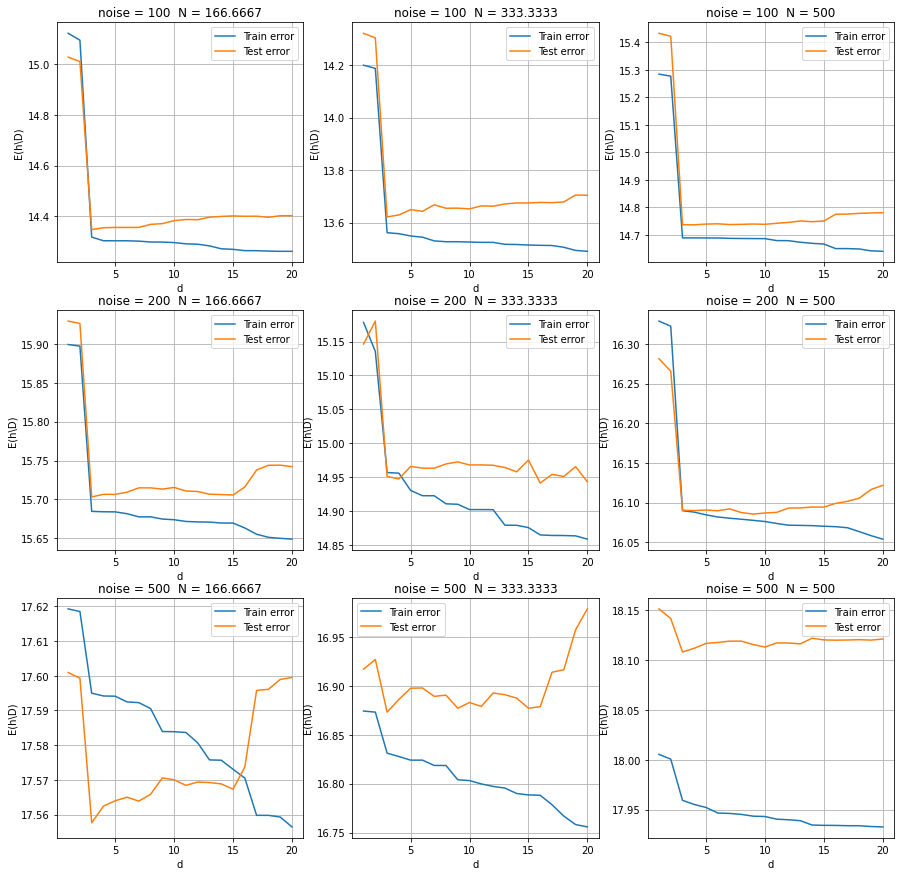

In [205]:
x= make_instances(-5,5,1000)
x_tr, x_te = train_test_split(x, test_size=0.5)

noise_list=[100,200,500]
N_list = [1/3,2/3,1]

fig, axs = plt.subplots(3, 3, figsize=(15,15))

for i,noise in enumerate(noise_list):
  for j,N in enumerate(N_list):

    y_tr=make_labels(x_tr,f, noise)
    y_te=make_labels(x_te,f, noise)

    x_train, x_1, y_train, y_1 = train_test_split(x_tr,y_tr, test_size=N)
    x_test, x_2, y_test, y_2 = train_test_split(x_te,y_te, test_size=N)

    E_train = []
    E_test = []

    for polinom in range(1,21): #za sve stupnje polinoma de[0,20]
      #train model
      phi_train = matrica_dizajna(x_train , float, polinom)
      w = np.dot(np.linalg.pinv(phi_train),y_train)
      h_train = h_x(w,phi_train)
      E= E_formula(h_train, y_train)
      #print(E)
      E_train.append(np.log(E))
      
      #test model
      phi_test = matrica_dizajna(x_test , float, polinom)
      #w isti za oba
      h_test = h_x(w,phi_test)
      E = E_formula(h_test, y_test)
      E_test.append(np.log(E))

    #plotting result
    axs[i,j].plot(list(range(1,21)), E_train, label='Train error')
    axs[i,j].plot(list(range(1,21)), E_test, label='Test error')
    axs[i,j].legend(loc="best")
    axs[i,j].set_xlabel('d')
    axs[i,j].set_ylabel('E(h\D)')
    axs[i,j].grid()
    axs[i,j].set_title(f"noise = {noise}  N = {round(N*500,4)}")

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [206]:
def w_regularizacija(phi,y,lam):
  #L2 regularizacija
  phi_T = np.matrix.transpose(phi)
  lam_I= np.identity(phi.shape[0])*lam
  pseudoinverz = np.dot(np.linalg.inv((np.dot(phi_T,phi)+lam_I)),phi_T) 
  return np.dot(pseudoinverz, y)

In [233]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

phi = matrica_dizajna(X,float,3)

for lam in [0,1,10]:
  w = w_regularizacija(phi,y,lam)
  print(f"w[lambda = {lam}] = {w}")

w[lambda = 0] = [ 4.         -5.91666667  3.375      -0.45833333]
w[lambda = 1] = [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
w[lambda = 10] = [0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [208]:
from sklearn.linear_model import Ridge

phi = matrica_dizajna(X,float,3)

for lam in [0,1,10]:
  #train ridge function
  ridge = Ridge(alpha=lam)
  w= ridge.fit(phi,y)
  print(f"w[lambda = {lam}] => w_0 = {w.intercept_}, w_n= {w.coef_[1:4]}\n")


for lam in [0,1,10]:
  #train ridge function
  ridge = Ridge(alpha=lam, fit_intercept=False)
  w= ridge.fit(phi,y)
  print(f"w[lambda = {lam}] => w_0 = {w.intercept_}, w_n= {w.coef_}")

w[lambda = 0] => w_0 = 4.000000000000028, w_n= [-5.91666667  3.375      -0.45833333]

w[lambda = 1] => w_0 = 3.0569614512471652, w_n= [-0.69079365 -0.2831746   0.1445805 ]

w[lambda = 10] => w_0 = 2.4944418431229725, w_n= [-0.15897295 -0.13423067  0.0815601 ]

w[lambda = 0] => w_0 = 0.0, w_n= [ 4.         -5.91666667  3.375      -0.45833333]
w[lambda = 1] => w_0 = 0.0, w_n= [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
w[lambda = 10] => w_0 = 0.0, w_n= [0.43312265 0.11060671 0.13827839 0.03093411]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

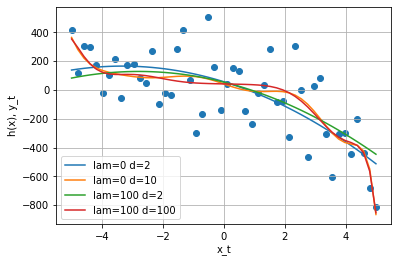

In [229]:
x_t = make_instances(-5,5,50)
y_t = make_labels(x_t, f, 200)

for lam in [0,100]:
  for d in [2,10]:
    phi = matrica_dizajna(x_t,float,d)
    ridge = Ridge(alpha=lam)
    ridge.fit(phi,y_t)
    h = ridge.predict(phi)
    plt.plot(x_t, h)

plt.scatter(x_t, y_t)
plt.xlabel('x_t')
plt.ylabel('h(x), y_t')
plt.grid()
plt.legend(["lam=0 d=2","lam=0 d=10","lam=100 d=2","lam=100 d=100"])
plt.show()
  


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


In [210]:
def E_formula(y,prediction):
  #oduzimanje y(stvarnog izlaza) dobivenog treniranjem i predviđenog izlaza y-pred na kvadrat
  E = 0
  for y, y_pred in zip(y, prediction):
    E += np.power((y - y_pred), 2)
  return E *0.5

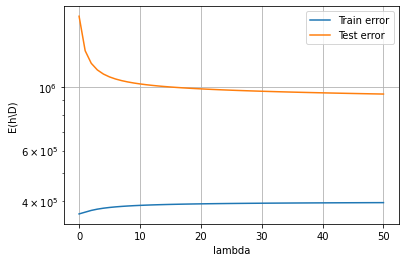

In [211]:
x_t = make_instances(-5,5,50)
y_t = make_labels(x_t, f, 200)

x_train,x_test,y_train,y_test = train_test_split(x_t,y_t, test_size=0.5) #omjer 1:1 zato 0.5
E_train = []
E_test = []

for lam in range(51): #[0,51]
  ridge = Ridge(alpha=lam)
  #train model
  phi_train = matrica_dizajna(x_train,float,10) #H_d=10,lambda
  ridge.fit(phi_train,y_train)
  h_train = ridge.predict(phi_train)
  E = E_formula(h_train, y_train)
  #print(E)
  E_train.append(E)
  
  phi_test = matrica_dizajna(x_test,float,10)
  h_test = ridge.predict(phi_test)
  E = E_formula(h_test, y_test)
  #print(E)
  E_test.append(E)

plt.plot(list(range(51)), E_train, label='Train error')
plt.plot(list(range(51)), E_test, label='Test error')
plt.yscale('log')
plt.legend(loc="best")
plt.xlabel('lambda')
plt.ylabel('E(h\D)')
plt.grid()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [212]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [213]:
def w_regularizacija(phi,y,lam):
  #L2 regularizacija
  phi_T = np.matrix.transpose(phi)
  lam_I= np.dot(np.identity(phi_T.shape[0]),lam)
  pseudoinverz = np.dot(np.linalg.inv((np.dot(phi_T,phi)+lam_I)),phi_T) 
  return np.dot(pseudoinverz, y)

def L2(w):
  w_trans = np.matrix.transpose(w)
  L2_norm = np.sqrt(np.dot(w_trans,w))
  return L2_norm
def L1(w):
  L1_norm = np.sum(np.abs(w))
  return L1_norm
def L0(w):
  L0_norm = nonzeroes(w)
  return L0_norm

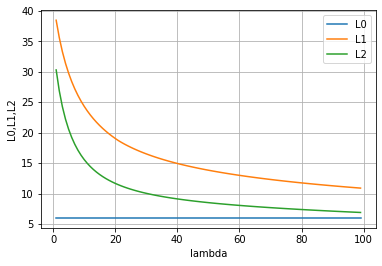

In [214]:
from sklearn.linear_model import Ridge

x_t = make_instances(-5,5,50)
y_t = make_labels(x_t, f, 200)

x_train,x_test,y_train,y_test = train_test_split(x_t,y_t, test_size=0.5) #omjer 1:1 zato 0.5
E_train = []

L0l=[]
L1l=[]
L2l=[]

for lam in range(1,100): 
    phi_train = matrica_dizajna(x_train , float, 5)
    w = w_regularizacija(phi_train, y_train,lam)
    L0l.append(L0(w))
    L1l.append(L1(w))
    L2l.append(L2(w)[0])


plt.plot(list(range(1,100)),L0l)
plt.plot(list(range(1,100)),L1l)
plt.plot(list(range(1,100)),L2l)
plt.legend(["L0", "L1", "L2"])
plt.xlabel('lambda')
plt.ylabel('L0,L1,L2')
plt.grid()
plt.show()

  


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

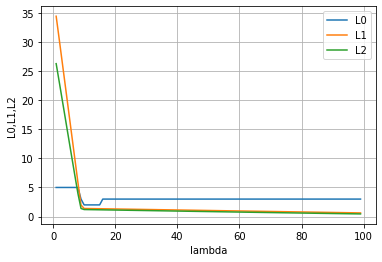

In [215]:
from sklearn.linear_model import Lasso

x_t = make_instances(-5,5,50)
y_t = make_labels(x_t, f, 200)

x_train,x_test,y_train,y_test = train_test_split(x_t,y_t, test_size=0.5) #omjer 1:1 zato 0.5
E_train = []

L0l=[]
L1l=[]
L2l=[]

for lam in range(1,100): 
    phi_train = matrica_dizajna(x_train , float, 5)
    lasso = Lasso(alpha=lam).fit(phi_train,y_train)
    w= lasso.coef_
    L0l.append(L0(w))
    L1l.append(L1(w))
    L2l.append(L2(w))


plt.plot(list(range(1,100)),L0l)
plt.plot(list(range(1,100)),L1l)
plt.plot(list(range(1,100)),L2l)
plt.legend(["L0", "L1", "L2"])
plt.xlabel('lambda')
plt.ylabel('L0,L1,L2')
plt.grid()
plt.show()



### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [216]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

print(type(grades_y))

<class 'numpy.ndarray'>


### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

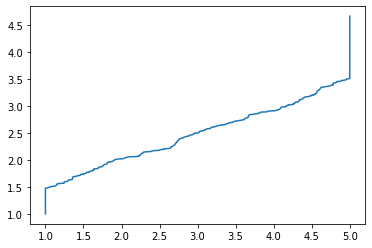

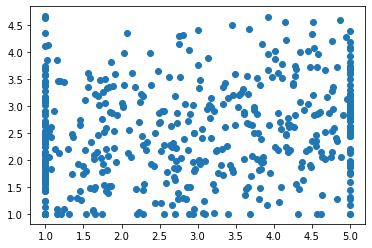

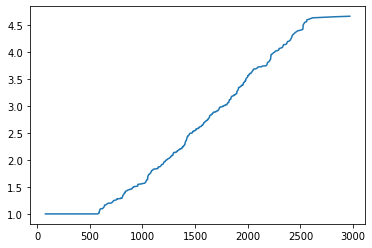

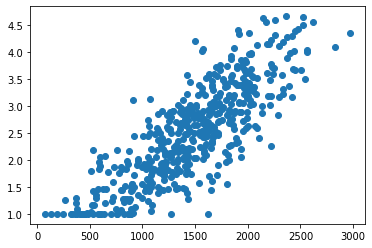

In [217]:
# Vaš kôd ovdje
plt.plot(np.sort(grade_in_highschool),np.sort(grades_y))
plt.show()
plt.scatter(grade_in_highschool,grades_y)
plt.show()
plt.plot(np.sort(exam_score),np.sort(grades_y))
plt.show()
plt.scatter(exam_score,grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [218]:
# Vaš kôd ovdje
w = w_regularizacija(grades_X, grades_y, 0.01)
print(w)

[0.00147711 0.1106004 ]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

w = w_regularizacija(grades_X_fixed, grades_y_fixed, 0.01)
h_train = h_x(w,grades_X_fixed)
print(w)

[[0.81630375]
 [0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [220]:
grades_X_fixed_colinear = np.repeat(grades_X_fixed,repeats=[1,2],axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [221]:
w = w_regularizacija(grades_X_fixed_colinear, grades_y_fixed, 0.01)
print(w)

[[0.81630364]
 [0.07583957]
 [0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [222]:
import statistics

w0 = []
w1 = []
w2 = []
w_0 = []
w_1 = []
w_2 = []

for i in range(1,10):
  grades_X_fixed_colinear_1,grades_X_fixed_colinear_2,grades_y_fixed_1,grades_y_fixed_2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
  for j,lam in enumerate([0.01,1000]):
    ridge = Ridge(alpha=lam)
    #train model
    ridge.fit(grades_X_fixed_colinear_1,grades_y_fixed_1)
    h_train = ridge.predict(grades_X_fixed_colinear_1)
    print(f"w[lambda = {lam} ] = {ridge.coef_[0]}\n")

    if j==0:
      w0.append(ridge.coef_[0][0])
      w1.append(ridge.coef_[0][1])
      w2.append(ridge.coef_[0][2])
    if j==1:
      w_0.append(ridge.coef_[0][0])
      w_1.append(ridge.coef_[0][1])
      w_2.append(ridge.coef_[0][2])


print(f"lambda = 0.001:\nstdev_w1 = {statistics.stdev(w0)}\nstdev_w2 = {statistics.stdev(w1)}\nstdev_w2 = {statistics.stdev(w1)}\n\n")
print(f"lambda = 1000:\nstdev_w1 = {statistics.stdev(w_0)}\nstdev_w2 = {statistics.stdev(w_1)}\nstdev_w2 = {statistics.stdev(w_1)}\n")

w[lambda = 0.01 ] = [0.79385128 0.06504303 0.06504303]

w[lambda = 1000 ] = [0.16436364 0.03812874 0.03812874]

w[lambda = 0.01 ] = [0.80739011 0.0761075  0.0761075 ]

w[lambda = 1000 ] = [0.15992321 0.02415424 0.02415424]

w[lambda = 0.01 ] = [0.814158   0.07673386 0.07673386]

w[lambda = 1000 ] = [0.16128257 0.02717137 0.02717137]

w[lambda = 0.01 ] = [0.83265053 0.07483515 0.07483515]

w[lambda = 1000 ] = [0.16579999 0.03405283 0.03405283]

w[lambda = 0.01 ] = [0.79735626 0.08013669 0.08013669]

w[lambda = 1000 ] = [0.15703356 0.02664742 0.02664742]

w[lambda = 0.01 ] = [0.81845427 0.04525193 0.04525193]

w[lambda = 1000 ] = [0.17833349 0.03188297 0.03188297]

w[lambda = 0.01 ] = [0.80086373 0.0614553  0.0614553 ]

w[lambda = 1000 ] = [0.15563723 0.022474   0.022474  ]

w[lambda = 0.01 ] = [0.81216485 0.06648337 0.06648337]

w[lambda = 1000 ] = [0.16174675 0.03077003 0.03077003]

w[lambda = 0.01 ] = [0.81501911 0.04444567 0.04444567]

w[lambda = 1000 ] = [0.16591703 0.01772788 0.017

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.